In [1]:
# 一个简单的选择排序重复寻找列表中的最小值，并且不断交换直到列表是有序的。
import numpy as np

# np.argmin,返回axis轴向上最小值的索引构成的矩阵


def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x


x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [2]:
# 这种选择排序的平均算法复杂度为O(N^2)
# bogosort
# np.random,shuffle作用就是重新排序返回一个随机序列作用类似洗牌
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x


x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [3]:
'''
这个很傻的算法的实现完全是碰运气：它不断对数组元素进行随机重 排，直到成为有序数组才停止。
这个算法的复杂度为 [N × N !]（N 乘 以 N 的阶乘）
很明显，这种方法是永远不会用于任何实际运算场景 的。
'''

'\n这个很傻的算法的实现完全是碰运气：它不断对数组元素进行随机重 排，直到成为有序数组才停止。\n这个算法的复杂度为 [N × N !]（N 乘 以 N 的阶乘）\n很明显，这种方法是永远不会用于任何实际运算场景 的。\n'

In [4]:
# NumPy中的快速排序：np.sort和np.argsort
# 默认情况下，np.sort 的排序算法是 快速排序，其算法复杂度为 [N log N]，另外也可以选择归并排序和堆排序。
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [5]:
# 例子，K个最近邻
'''
以下示例展示的是如何利用 argsort 函数沿着多个轴快速找到集合中 每个点的最近邻。
首先，在二维平面上创建一个有 10 个随机点的集 合。按照惯例，将这些数据点放在一个 10×2 的数组中：
np.random.rand()通过本函数可以返回一个或一组服从“0~1”均匀分布的随机样本值。随机样本取值范围是[0,1)，不包括1。
'''
rand = np.random.RandomState(42)
X = rand.rand(10, 2)
X

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914]])

In [6]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
# 设置画图风格
# x[:,n]表示在全部数组（维）中取第n个数据，直观来说，x[:,n]就是取所有集合的第n个数据,
seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [7]:
# 计算两两数据点对间的距离
# 可以用一行代码计算矩阵的平方距离：

# 在坐标系中计算每对点的差值
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

# 求出差值的平方
sq_differences = differences ** 2
sq_differences.shape

# 将差值求和获得平方距离
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [8]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
# 使用 np.argsort 函数沿着每行进行排序了。
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


In [10]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

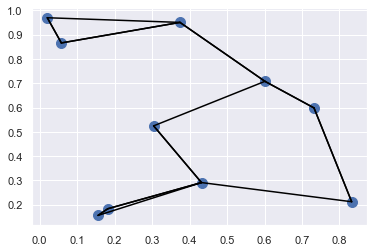

In [11]:
# 为了将邻节点网络可视化，我们将每个点和其最近的两个最近邻连接
plt.scatter(X[:, 0], X[:, 1], s=100)
# 将每个点与它的两个最近邻连接
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 画一条从X[i]到X[j]的线段
        # 用zip方法实现：
        plt.plot(*zip(X[j], X[i]), color='black')

In [12]:
'''
图中每个点和离它最近的两个节点用连线连接。
乍一看，你可能会奇怪 为什么有些点的连线多于两条，这是因为点 A 是点 B 最邻近的两个节 点之一，
但是并不意味着点 B 一定是点 A 的最邻近的两个节点之一。
一般用大O标记对于比较算法的性能是有用的。
'''

'\n图中每个点和离它最近的两个节点用连线连接。\n乍一看，你可能会奇怪 为什么有些点的连线多于两条，这是因为点 A 是点 B 最邻近的两个节 点之一，\n但是并不意味着点 B 一定是点 A 的最邻近的两个节点之一。\n'